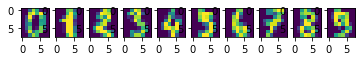

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [2]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [3]:
#On découpe la base en training et test
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6291718170580964


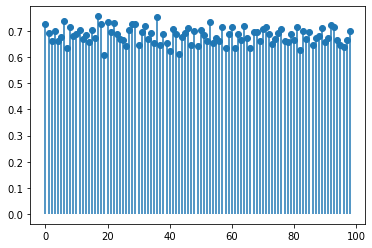

In [4]:
#valeur de l'accuracy pour 100 tirages
accuracies = list()
for i in range(0,99) : 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy = clf.score(X_test,y_test)
    accuracies.append(accuracy)
    plt.stem(i,accuracy)
plt.show()

In [5]:
#Caluler la variance
var_accuracy = np.var(accuracies)
var_accuracy

0.0009826892043025086

In [6]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(),
max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

In [7]:
accuracy

0.8893695920889988

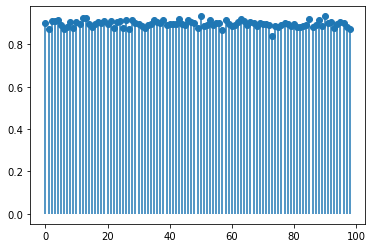

In [8]:
#valeur de l'accuracy pour 100 tirages (bagging)
accuracies_bagging = list()
for i in range(0,99) : 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(),max_samples=0.5, max_features=0.5, n_estimators=200)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy = clf.score(X_test,y_test)
    accuracies_bagging.append(accuracy)
    plt.stem(i,accuracy)
plt.show()

In [9]:
#Caluler la variance
var_accuracy = np.var(accuracies_bagging)
var_accuracy

0.00021942185948336002

In [19]:
#construire le graphique accuracy et n_estimators
accuracies_liste = list()
liste = list()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
for i in range(10,1000,20):
    clf = BaggingClassifier(tree.DecisionTreeClassifier(),max_samples=0.5, max_features=0.5, n_estimators=i)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy = clf.score(X_test,y_test)
    accuracies_liste.append(accuracy)
    liste.append(i)

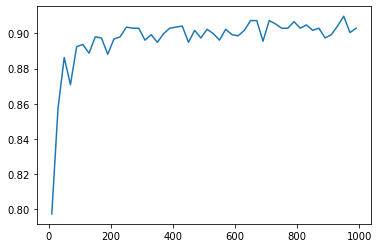

In [22]:
plt.plot(liste,accuracies_liste)

In [23]:
#A chaque fois que le n_estimators est grand, l'accuracy augmente

In [24]:
#varier max_samples et max_features
#grid search
from sklearn.model_selection import GridSearchCV

max_samples = [0.2, 0.3, 0.5] 
max_features=[0.1, 0.3 ,0.5]
parameters={'max_samples':max_samples,'max_features':max_features}
model = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=200)
grid_search = GridSearchCV(estimator=model,param_grid=parameters,verbose=True,cv=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         n_estimators=200),
             param_grid={'max_features': [0.1, 0.3, 0.5],
                         'max_samples': [0.2, 0.3, 0.5]},
             verbose=True)

In [26]:
#Meilleurs parametres a choisir
grid_search.best_params_

{'max_features': 0.5, 'max_samples': 0.5}

In [27]:
#Meilleur score obtenue pour ces params
grid_search.best_score_

0.9274011299435028